# Exam 2

Reminders:
* Answer questions directly. Extraneous information may result in point deduction.
* Answer easier questions first, then move on to more difficult questions.
* You have at most one hour and fifty minutes to complete this learning exercise.

By typing my name here, I promise I have not committed any act of academic dishonesty including:
1. Copying from a student’s solutions or allowing a student to copy from one’s solutions
2. Using the internet or making phone calls to find solutions
3. Sharing any information about the test with anyone who has not taken it

Student Name: Joshua Carney


Date: 4/6/2022

**If a code cell has syntax errors, the most you can get is half of its points.**

## Part 1: Data Cleaning and Transformation

### Question 1: Find the outlier (10 points)

Import all the necessary libraries and load the file ``googleplaystore.csv`` as a pandas DataFrame.
**Find and drop** the outlier whose 'Category', 'Rating', 'Size', 'Type', 'Price', etc. are so different than other rows. For the outlier, the values of 'Category', 'Rating', 'Size', 'Type', 'Price', etc. are ``NOT MISSING``, but so different. **You must use code to illustrate how you find the outlier.** 


In [43]:
# import necessary libraries and load data
import pandas as pd
import numpy as np

data = pd.read_csv('googleplaystore.csv')

# find the outlier

# Commented these out so the last part of this block displays

# print(data.value_counts('Category')) # One value with the category "1.9"
# print(data.value_counts('Rating'))   # One value with the rating 19.0
# print(data.value_counts('Type'))     # One value with the type "0"

data[data['Category'] == "1.9"]
idx = data[data['Category'] == "1.9"].index # Get index of outlier
# drop the outlier

data.drop(labels=idx, axis=0, inplace=True)

# check if it is dropped (optional but helpful)
data[data['Category'] == "1.9"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Question 2 Handle Missing Vlaues(10 points)
First of all, **use one line of code** to check which column has the most missing values. After looking at the data, you should realize that the reason of having these missing values is due to the lack of enough reviews. So we want to keep the rows with more than 100 reviews. The we can drop rows and columns that still have missing values. Follow the instructions in the cell below. To get full credits, your result DataFrame must have ``7430`` rows with no missing values.

In [45]:
# check which column has the most missing values


# Your answer: 


# Keep the rows with more than 100 reviews

data = data[data['Reviews'].astype(int) > 100]

# Then you can check the number of missing values again


# Drop all rows with Null values in 'Rating'

data.dropna(subset=['Rating'], inplace=True)

# Drop columns 'Current Ver' and 'Android Ver'

data.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

# Check
data.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


### Question 3: Feature Scaling and Data Transformation (15 points)
Use One-Hot encoding to encode the column ``Type``.

Use Ordinal encoding to encode the column ``Category``.

Use MinMax Scaler to normalize columns ``Rating`` and ``Reviews`` to range [0, 100].

You should create new columns for feature scaling and encoding.

In [46]:
# Use One-Hot encoding to encode the column 'Type'
# YOU MUST USE sklearn to get any points
# You must create new columns for encoded 'Type' and 
# the names of the columns must be 'Free' and 'Paid'
from sklearn.preprocessing import OneHotEncoder 

ohe = OneHotEncoder() 
encoded_data = ohe.fit_transform(data[['Type']]).toarray()
encoded_data = pd.DataFrame(data=encoded_data, columns=['Free', 'Paid'])

data = data.join(encoded_data)
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Free,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.0,0.0


In [53]:
# Use Ordinal encoding to encode the column 'Category'
from sklearn.preprocessing import OrdinalEncoder

order_encoder = OrdinalEncoder(categories='auto')

data['Category_Encoded'] = order_encoder.fit_transform(data['Category'].to_numpy().reshape(-1, 1))

data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Free,Paid,Category_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.0,0.0,0.0


In [54]:
# Use MinMax Scaler to normalize columns Rating and Reviews to range [0, 100].
from sklearn.preprocessing import MinMaxScaler

rating_scaler = MinMaxScaler(feature_range=(0, 100))
review_scaler = MinMaxScaler(feature_range=(0, 100))

rating_scaler.fit(data['Rating'].values.reshape(-1,1)) 
review_scaler.fit(data['Reviews'].values.reshape(-1,1))

data['Rating_Scaled'] = rating_scaler.transform(data['Rating'].values.reshape(-1, 1))
data['Reviews_Scaled'] = review_scaler.transform(data['Reviews'].values.reshape(-1, 1))

data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Free,Paid,Category_Encoded,Rating_Scaled,Reviews_Scaled
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0,0.0,0.0,73.529412,0.000074
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1.0,0.0,0.0,67.647059,0.001108
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.0,0.0,0.0,91.176471,0.111836
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",1.0,0.0,0.0,85.294118,0.275778
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.0,0.0,0.0,79.411765,0.001108


## Part 2: Data Visualization

For all the plottings, you must set seaborn to overwirte Matplotlib.

### Question 4 (14 points)

In [74]:
# importing and setting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn to overwirte Matplotlib

sns.set_theme()

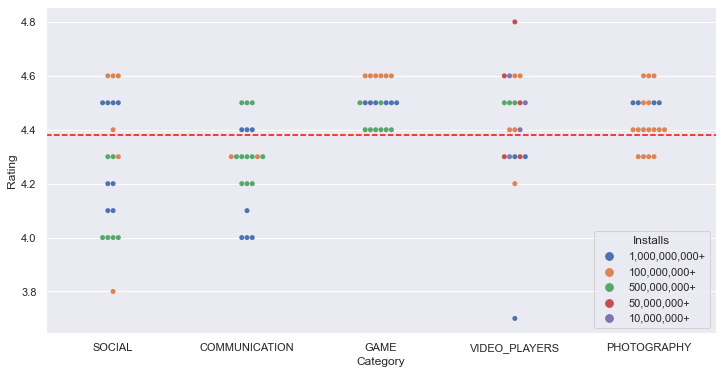

In [65]:
# Find the top 5 categories with the highest average reviews 
# Hint: You cannot compute the sum of reviews since the number of apps for each category is different
#       You should compute the mean for each category
top_cats = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)[:5]

# Find the most reviewed 20 apps in EACH category of the top 5 categories

# Plot the figure below
# x axis is the top 5 categories with the highest reviews
# y axis is ratings 
# Use 'Installs' as hue (as showed in the image below)
# Set the figsize to be (12, 6)
# Draw a red dashed line for the mean() of ratings


### Question 5 (8 points)
Use pie plot to show the top 8 categories with the most apps.

Text(0.5, 1.0, 'Percentage of Different Categories')

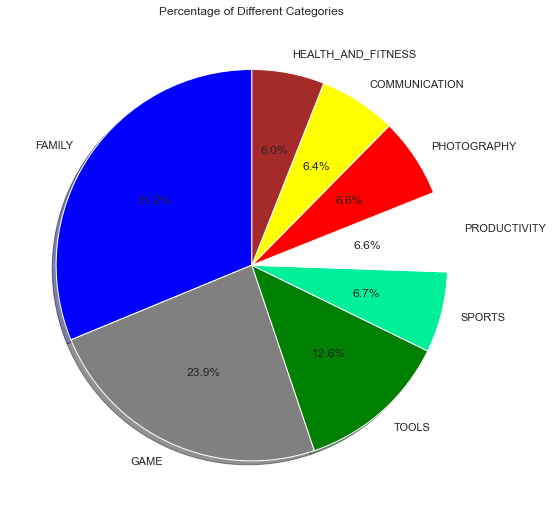

In [165]:
# Count the total number of apps for each category and pick the top 8
topapps =  data.value_counts('Category')[:8]
# Create sizes and labels for pie plot

# Use the following colors
colors = ['blue', 'gray', 'green', '#00f099', 'white', 'red', 'yellow', 'brown']

# pie plot, figure size should be (11, 9)
types = topapps.index

plt.figure(figsize=(11,9))
plt.pie(topapps, labels=types, colors=colors,
        startangle=90,
        shadow=True,
        autopct='%.1f%%')
plt.title('Percentage of Different Categories')


### Question 6 (6 points)
In part 1, we normalized ``Rating`` and ``Reviews``.

Use scatter plot to plot the **scaled columns**.

Then plot their histograms.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


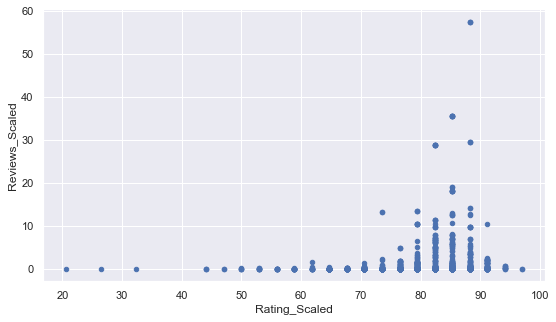

In [75]:
# Find all apps in Category 'GAME'
all_games = data[data['Category'] == 'GAME']

# Use scatter plot to show the Normalized Rating and Normalized Reviews of all GAME apps
# figure size (9, 5)


all_games.plot.scatter(x='Rating_Scaled', y='Reviews_Scaled', figsize=(9,5))


plt.show()

(array([  13.,   10.,   36.,   50.,  123.,  394.,  728., 2886., 2607.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

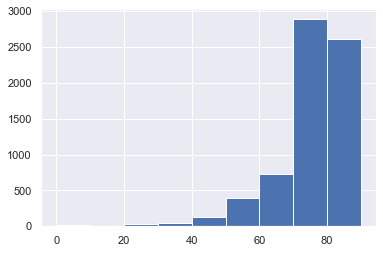

In [82]:
# Plt the histogram for normalized rating and normalized reviews of all apps
statbins = np.arange(0, 100, 10)
plt.hist(data['Rating_Scaled'], bins=statbins)

(array([7.304e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

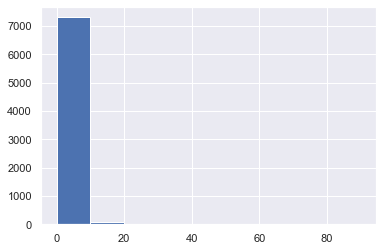

In [84]:
statbins = np.arange(0, 100, 10)
plt.hist(data['Reviews_Scaled'], bins=statbins)

### Question 7 (6 points)
Use ``barplot`` to show the average reviews for each category.
It is fine to have overlappings for x-axis labels.

<AxesSubplot:xlabel='Category'>

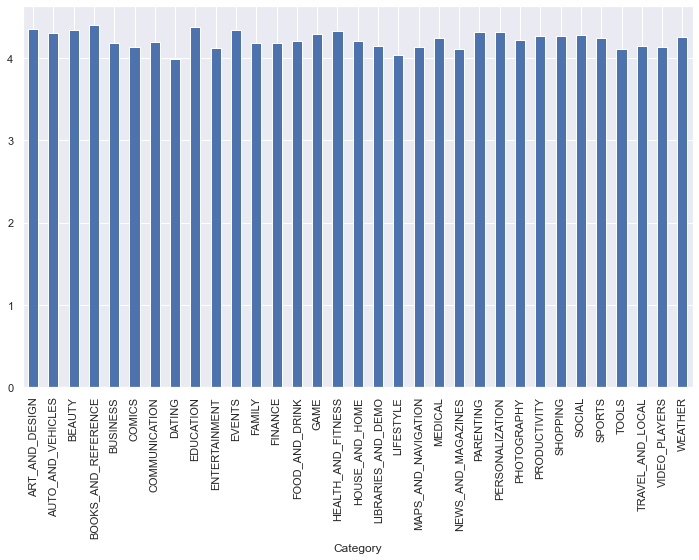

In [91]:
# Compute the mean reviews for each category
cat_means = data.groupby('Category')['Rating'].mean()
# barplot
# x axis is Category
# y axis is the mean reviews
# figure size (12, 7)
cat_means.plot.bar(x='Category', figsize=(12,7))


### Question 8 (6 points)
Plot the same figure as shown in below.It is fine to have overlappings for x-axis labels. 

<AxesSubplot:xlabel='Category'>

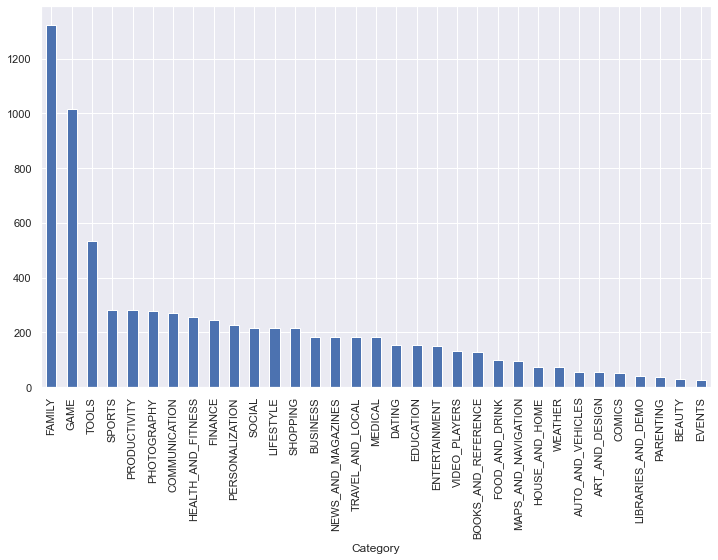

In [98]:
# Pay attention to the figure below and determine which plotting function you should use.
# color can be different
# figure size (12, 7)
cat_count = data.value_counts('Category')
cat_count.plot.bar(x='Category', y='count', figsize=(12,7))

## Part 3: Clustering

### Question 9 (10 points)

Use K-Means method to cluster the iris dataset and compute its accuracy.

In [132]:
# DO NOT CHANGE THIS CELL
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

# y is coded Species of iris
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'versicolor', 1: 'setosa', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,versicolor
1,4.9,3.0,1.4,0.2,0,versicolor
2,4.7,3.2,1.3,0.2,0,versicolor
3,4.6,3.1,1.5,0.2,0,versicolor
4,5.0,3.6,1.4,0.2,0,versicolor


In [133]:
# Use K-Means to cluster the iris dataset into 3 clusters
# TO GET ANY POINTS, you should NOT use PCA
from sklearn.cluster import KMeans
num_clusters = 3
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(X)
 
# Predict the target variable
pred=km.predict(X)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [134]:
df['C_label'] = pred
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species,C_label
0,5.1,3.5,1.4,0.2,0,versicolor,1
1,4.9,3.0,1.4,0.2,0,versicolor,1
2,4.7,3.2,1.3,0.2,0,versicolor,1
3,4.6,3.1,1.5,0.2,0,versicolor,1
4,5.0,3.6,1.4,0.2,0,versicolor,1


In [135]:
# Compare the prediction with the real label and 
# Compute the accuracy
count = 0
for indices, row in df.iterrows():
    if row.Label == 0 and row.C_label == 0 or row.Label == 1 and row.C_label == 1 or row.Label == 2 and row.C_label == 2:
        count += 1

print(count)
print(count / len(df))

36
0.24


### Question 10 (20 points)

Use ``PCA`` to reduce the dimensionality of the iris dataset. Then use ``Hierarchical Clustering`` method to cluster the iris dataset into 3 clusters. Then visualize the dataset with three colors.

In [145]:
# Use PCA to reduce the dataset to TWO dimensions 'PC1' and 'PC2'
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3','PC4'])
merged_df = pd.merge(df, pca_df, right_index=True, left_index=True)
merged_df.head()
reduced = merged_df[["PC1", "PC2"]]
reduced.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


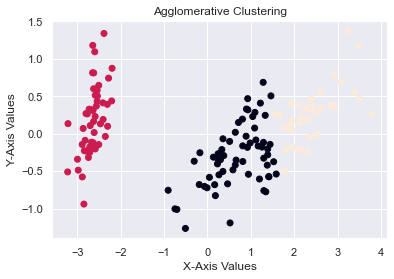

In [155]:
# Use Hierarchical Clustering (Agglomerative Clustering) to cluster the dataset into three clusters
# Then plot the data
# X-axis is PC1
# Y-axis is PC2
# You MUST use agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(reduced)

pred=ac.labels_
plt.scatter(reduced.PC1, reduced.PC2, c=pred, marker="o")


plt.title('Agglomerative Clustering')
plt.xlabel('X-Axis Values')
plt.ylabel('Y-Axis Values')
plt.show()

In [148]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [76]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [154]:

merged_df['C_label'] = pred
# Compare the 'pred' with the Label 
# and compute the accuracy of agglomerative clustering
count = 0
for indices, row in merged_df.iterrows():
    if row.Label == 0 and row.C_label == 0 or row.Label == 1 and row.C_label == 1 or row.Label == 2 and row.C_label == 2:
        count += 1
print(count)
print(count / merged_df.shape[0])

36
0.24
